In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy import coordinates
from skipper import observe
import sys
sys.path.append('../scripts/')
import our_pointings

In [8]:
dbname = '/Users/kadofong/Downloads/db_merian.fits'
telename = '/Users/kadofong/Downloads/tele20230523.csv'

In [4]:
halpha_pointings, oiii_pointings =  our_pointings.load_fallfields()

In [5]:
mfilt = 'N540'
cofilt = 'N708'
if cofilt == 'N708':
    skySB_0 = 21.
    teff_min = 200.
elif cofilt == 'N540':
    skySB_0 = 22.1
    teff_min = 300.

In [9]:
coo = observe.CopilotOutput ( dbname, pointings=halpha_pointings,  skySB_0 = skySB_0 )

In [11]:
finished = coo.identify_completed_pointings(teff_min)

In [12]:
mastercat = oiii_pointings

In [13]:
observed_cofilter = coordinates.SkyCoord ( finished['rabore'], finished['decbore'], unit=('deg','deg') )
pointings_mfilter = coordinates.SkyCoord ( mastercat['RA'], mastercat['dec'], unit=('deg','deg') )

In [14]:
idx, d2d, _ = pointings_mfilter.match_to_catalog_sky ( observed_cofilter )

In [15]:
has_observed_match = d2d.to('arcsec').value < 2.

In [16]:
# \\ all observed pointings should have a match in the second filter pointing
assert has_observed_match.sum() == observed_cofilter.shape[0]

Text(0, 0.5, 'Dec (deg)')

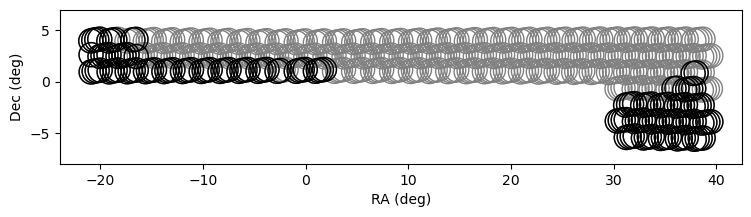

In [32]:
fig = plt.figure(figsize=(10,2))
ax = plt.subplot(111)
ax.set_aspect('equal')
wrap = lambda ra: np.where(ra > 200, ra-360, ra )

plt.scatter ( wrap(pointings_mfilter.ra.value), pointings_mfilter.dec, s=300, facecolor="None", edgecolor='grey' )
plt.scatter ( wrap(observed_cofilter.ra.value), observed_cofilter.dec, s=300, facecolor="None", edgecolor='k' )
plt.ylim(-8,7)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')

In [35]:
from astropy import units as u

In [41]:
(2.66667 * u.hourangle ).to(u.deg).value# - 360.

40.000049999999995

In [51]:
(np.sqrt(2.)*(0.1*u.arcsec)/(1250. * 5.*u.year)).to(u.microarcsecond/u.yr)

<Quantity 22.627417 uarcsec / yr>